# NLTK를 중심으로 stemmer, lemmatizer, stopwords제거, tokenizing (문장 단, 단어 단), wordcloud (고급 수준) 등 테스트 프로젝트 by 유형균 

## 한국어 전용 KoNLPy는 뒤에서 다룸

In [86]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 다양한 색상 팔레트를 이용한 워드클라우드
# jiffyclub.github.io/palettable

# 여러가지 배색들을 도와주는 패키지

# 말뭉치 fam
from konlpy.corpus import kolaw
from konlpy.corpus import kobill


!pip install palettable
!pip install colorbrewer

from wordcloud import ImageColorGenerator


import random
from palettable.colorbrewer.sequential import Reds_9
from palettable.colorbrewer.diverging import RdYlBu_11
from palettable.colorbrewer.qualitative import Pastel2_8

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import nltk
nltk.download('book', quiet=True)
from nltk.book import * # text1 부터 text9까지 다양한 텍스트가 제공

nltk.corpus.gutenberg.fileids() #저작권이 말소된 문학작품을 포함하는 구텐베르그 말뭉치를 확인
nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tag import pos_tag
from nltk import sent_tokenize
from nltk import word_tokenize

# 원형 찾아주기
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer # 위 stemmer보단, 아래 lemmatizer가 성능이 좋음. 단 후자의 경우 품사 지정해줘야!

from nltk.tag import pos_tag
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# KoNLPy
# NLTK는 영어 정보처리를 위한 패키지
# 반면, KoNLPy는 한국어 정보처리를 위한 패키지임

# 서울대학교 산업공학과가 개발한 형탯호 분석기
# 래퍼 피키지인데, 이미 개발된 한글 형태소 분석기를
# 파이썬에서 바로 사용할 수 있도록 도와줌

# 현재까지 지원하는 형태소 분석기는 모두 5가지
# => Hannanum, Kkma, Komoran, Mecab , Okt (구 Twitter)

# konlpy-ko.readthedocs.io 
# konlpy.org

# KoNLPy 설치 전 필수 패키지가 JPype1인데
# Visual C++ 14 버전 필요!! => visualstudio
# ==> 하지만, 미리 컴파일된 ㅍ ㅐ키지가 배포됨
# www.lfd.uci.edu/~gohlke/pythonlibs
# JPype1 패키지를 다운로드한 후 설치함
# JPype1‑0.7.0‑cp36‑cp36m‑win_amd64.whl

# !pip install JPype1‑0.7.0‑cp36‑cp36m‑win_amd64.whl

# colab에서는 위 JPype1 별도설치 안해도 됨

!pip install konlpy
import konlpy
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Mecab
from konlpy.tag import Okt # 구 Twitter

##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 다양한 색상 팔레트를 이용한 워드클라우드
# jiffyclub.github.io/palettable

# 여러가지 배색들을 도와주는 패키지

!pip install palettable
!pip install colorbrewer

from wordcloud import ImageColorGenerator


import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 텍스트 마이닝
# : 자연어로 구성된 "비정형 데이터"에서 패턴 또는 관계를 추출하여 의미 있는
# 정보를 찾아내는 기법득을 의미
# => 트위터, 페이스북, 블로그, 웹게시판, 온라인 뉴스 웹 상에 존재하는 방대한
#    비정형 데이터를 실시간으로 수집/분석하여 고객의 감성 및 의도등을 알아내는 과정
# => 자연어 처리(NLP : Natural Language Processing)와
#    텍스트분석(Text Analytics)등이 핵심 분야

# 텍스트마이닝활용분야
# 텍스트분류 : 문서가 특정 분류/카테고리에 속사는 것을 예측
# 감성분석 : 텍스트에 나타나는 감정/판단/믿음/의견 등 주관적인 요소를 분석
# 텍스트요약 : 텍스트 내에서 중요한 주제나 중심사상을 추출
# 텍스트군집화 : 비슷한 유형의 문서에 대한 군집화를 수행

# 텍스트 분석 수행 과정
# - 텍스트(데이터) 사전준비/전처리
# : 대/소문자변경, 클렌징(숫자, 특수문자제거), 토큰화, 불용어 제거, 어근추출
# - 특성 벡터화/추출
# : 가공된 텍스트에서 특성 추출후 여기에 벡터값을 지정, BOW, Word2Vec 등을 사용
# - 머신러닝 모델 학습/예측/평가
# : 감성분석, 연관성분석 등

# 파이썬 기반 텍스트 분석패키지
# - NLTK, KoNLPK : 영어권/한국어 형태소 분석기
# - Gensim : 텍스트 요약(토픽모델링)에 두각을 나타냄. word2vec 기능도 구현되어 있음
# - SpaCy : 최근 주목받는 NLP패키지

# NLTK : 교육용으로 개발된 자연어 처리 및 분석용 파이썬 패키지
# 다양한 예제를 포함하고 있음
# 설치방법 : pip install nltk
# 홈페이지 : www.nltk.org
import nltk

# nltk 내장 영어말뭉치
nltk.download('book')


from nltk import sent_tokenize # 문장 토큰화
from nltk import word_tokenize # 단어 토큰화

# 텍스트 토근화 : 문장 토큰화 => 단어 토큰화
# - 문장 토큰화 : 문서에서 문장를 분리
# - 단어 토큰화 : 문장에서 단어를 분리

nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text_sample)
print(type(sentences)) # 문장 토근화 결과는 리스트로 생성
print(len(sentences), sentences)

# 문장토큰화 후 단어토큰화 실시
# 1. for문 사용
words = []
for sent in sentences:
    words.append(word_tokenize(sent))
print(type(words), len(words), words)
# 2. compression 사용
words = [word_tokenize(sent) for sent in sentences]
print(type(words), len(words), words)

# 불용어stopword 제거 : 분석상 큰 의미가 없는 단어를 지칭
# NLTK 상에서는 stopwords 형태로 제공됨 - 단어수는 적음
nltk.download('stopwords')
# NLTK의 stopwords에서 제공하는 불용어 사전 단어 개수
len(nltk.corpus.stopwords.words('english'))
nltk.corpus.stopwords.words('english')[:20]

# 불용어를 이용한 단어 토큰화 실시
stopwords = nltk.corpus.stopwords.words('english')

all_tokens = []
for sent in words: # 단어토근화된 결과에서 한 문장씩 읽어옴
    filter_words = []
    for word in sent: # 문장에서 한 단어씩 읽어옴
        word = word.lower() # 소문자 변환
        if word not in stopwords: # 불용어 목록에 포함되지 않는 단어만 filter_words에 추가
            filter_words.append(word)
    all_tokens.append(filter_words)
print(all_tokens)
#----------------------------------------------------------------------------
# 트럼프 연설문에 대해 단어 토큰화 실시
import csv

f = open("thrump.txt", 'r', encoding='cp949')
doc = f.read()
doc

sentences = sent_tokenize(doc)
sentences

words = [word_tokenize(sent) for sent in sentences]
print(type(words), len(words), words)

all_tokens = []
for sent in words: # 단어토근화된 결과에서 한 문장씩 읽어옴
    filter_words = []
    for word in sent: # 문장에서 한 단었기 읽어옴
        word = word.lower() # 소문자 변환
        if word not in stopwords: # 불용어 목록에 포함되지 않는 단어만 filter_words에 추가
            filter_words.append(word)
    all_tokens.append(filter_words)
print(all_tokens)

#===========================================================================
# 형태소 분석
# 형태소는 언어학에서 일정한 의미가 있는 가장 작은 말의 단위를 의미
# 주어진 단어 또는 어절을 구성하는 각 형태소를 분리한 후 분리된 형태소의 기본형 및
# 품사정보를 추출하는 것을 형태소 분석이라 함.
# 문장 => 어절 => 단어 => 어근/접두사/접미사 => 품사구분

# 어근 추출stemming
# 많은 언어들은 문법적 요소에 따라 단어가 다양하게 변함
# 영어의 경우 과거/현재/미래, 3인칭 단수여부, 진행형 등에 따라 원래 단어가 변화함
# 문법적으로 단어의 원형을 찾는 것을 stemming이라 함
# NLTK에서 제공하는 stemmer는 Porter, Lancaster, snowball stemmer 등이 있음
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()
word = ['working','works','worked']
[stemmer.stem(w) for w in word]
word = ['amusing','amuses','amused'] # amuse 분석부족
[stemmer.stem(w) for w in word]
word = ['happier','happiest'] # happy 분석부족
[stemmer.stem(w) for w in word]
word = ['fancier','fanciest'] # 분석부족
[stemmer.stem(w) for w in word]
word = ['flies','flying','flew','flown'] # fly 분석부족
[stemmer.stem(w) for w in word]

#----------------------------------------------------------------------------
# 원형 복원lemmatizing
# 의미적으로 단어의 원형을 찾는 것을 lemmatizing이라 함
# stemming 보다 좀더 정교하게 단어의 원형을 찾음
# NLTK에서 제공하는 lemmatizer는 WordNetLemmatizer가 있음
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

# 원형 추출시 품사를 지정해야 함.
lemma = WordNetLemmatizer()
word = ['working','works','worked']
[lemma.lemmatize(w,'v') for w in word] # 'v' 동사
word = ['amusing','amuses','amused']
[lemma.lemmatize(w,'v') for w in word]
word = ['happier','happiest']
[lemma.lemmatize(w,'a') for w in word] # 'a':형용사
word = ['fancier','fanciest']
[lemma.lemmatize(w,'a') for w in word]
word = ['flies','flying','flew','flown']
[lemma.lemmatize(w,'v') for w in word]

#----------------------------------------------------------------------------
# 품사 태깅POS tagging
# 단어를 문법적 기능이나 형태, 의미에 따라 구분한 것
# NLTK에서는 Penn Treebank Tagset을 이용해서 품사태깅을 함
# NNP:고유명사, VB:동사, VBP:현재진행형 동사, TO:전치사, NN:명사, DT:관형사, ADJ:형용사
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

text = 'The Matrix is everywhere its all around us, here even in this room.'
tags = pos_tag(word_tokenize(text))
tags[0]
# 명사만 추출하기
NN = [w[0] for w in tags if w[1] == 'NN']

In [0]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 텍스트 마이닝 - 형태소 분석

# 자연어로 구성된  "비정형 데이터" 에서 패턴 또는 관계를 추출하여 
# 의미있는 정보를 찾아내는 기법들을 의미

# => 트위터, 페이스북, 블로그, 웹게시판, 온라인 뉴스 등 
#      웹상에 존재하는 방대한 비정형 데이터를 실시간으로 
#      수집/ 분석하여 고객의 감성 및 의도등을 알아내는 과정을 의미
     
# => 자연어 처리(Natural Language Processing)와 
#    텍스트 분석(Text Analytics)등이 핵심분야

# ==> 텍스트 마이닝 활용 분야  
#     텍스트분류 : 문서가 특정 분류/카테고리에 속하는 것을 예측
#     감성분석 : 텍스트에 나타나는 감정/판단/믿음/의견 등 주관적인 요소를 분석
#     텍스트요약 : 텍스트 내에서 중요한 주제나 중심사상을 추출
#     텍스트군집화 : 비슷한 유형의 문서에 대해 군집화를 수행


# 텍스트 분석 수행 과정
# 텍스트 사전준비 / 전처리 : 대 / 소문자변경, 문장 / 숫자 / 특수문자 삭제, 
#                            토큰화, 불용어 제거, 어근추출 
# 특성 벡터화 / 추출 : 가공된 텍스트에서 특성 추출 후 
#                      여기에 벡터값을 지정, BOW, Word2Vec 등을 사용
# 머신러닝모델 학습 / 예측 / 평가 : 감성분석 / 연관성분석


# 파이썬 기반 텍스트 분석 패키지
# NLTK, KoNLPy : 영어권 / 한국어 형태소 분석기

# Gensim : 텍스트 요약(토픽모델링)에 두각을 나타냄
#          word2vec 기능도 구현되어 있음

# SpaCy : 최근 주목받는 NLP 패키지

# NLTK : 교육용으로 개발된 자연어 처리 및 분석용
#        분석용 파이썬 패키지
#        다양한 예제를 포함하고 있음

In [6]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# www.nltk.org

# pip install nltk
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

# 텍스트 토큰화
# 문장 토큰화 : 문서에서 문장을 분리
# 단어 토큰화 : 문장에서 단어를 분리

nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text_sample)
print('------------------------')
print(type(sentences))   # 문장토큰화 결과는 리스트로 생성
print('------------------------')
print(len(sentences)) # 3 찍힘.sent_tokenize()이기에, period를 중심으로 tokenize 했다는 것을 알 수 있음.
print('------------------------')
print(sentences)
print('------------------------')


text = 'The Matrix is everywhere its all around us, here even in this room.'

words = word_tokenize(text)
print('------------------------')
print(type(words))   # 단어토큰화 결과는 리스트로 생성 // # word_tokenize! 위와 비교해볼 것
print('------------------------')
print(len(words))
print('------------------------')
print(words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
------------------------
<class 'list'>
------------------------
3
------------------------
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']
------------------------
------------------------
<class 'list'>
------------------------
15
------------------------
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [7]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 문장 토큰화 후 단어토큰화를 실시

words = []

for sent in sentences:
    words.append(word_tokenize(sent))

print(words)
print('------------------------')

words = [word_tokenize(sent) for sent in sentences] # 위 for 문과 아래 lambda 동일 결과 반환

print(words) #  리스트 내 3개 리스트 형성. 각 리스트 안에 단어 tokenize


[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]
------------------------
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


In [14]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 불용어stopword 제거

# 분석상 큰 의미가 없는 단어를 지칭
# NLTK 상에서는 stopwords 형태로 제공됨 
# 단어수는 적음

nltk.download('stopwords') # 우선 nltk.download로 불용어 모음 다운로드
print('------------------------')
print(len(nltk.corpus.stopwords.words('english')))
print('------------------------')
print(nltk.corpus.stopwords.words('english')[:20])
print('------------------------')

# 불용어를 이용한 단어토큰화 실시

stopwords = nltk.corpus.stopwords.words('english')

all_tokens = []
for sent in words:   # 단어토큰화된 결과에서 한 문장을 읽어옴
    print(sent)
    filter_words = []
    
    for word in sent:   # 문장에서 각 단어를 읽어옴
        word = word.lower()   # 소문자 변환
        
        if word not in stopwords:   # 불용어 목록에 단어 포함여부 확인
            filter_words.append(word)
    
    all_tokens.append(filter_words)

print('------------------------')
print(all_tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
------------------------
179
------------------------
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']
------------------------
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']
['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.']
['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']
------------------------
[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [16]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 예제) 트럼프 연설문에 대해 단어 토큰화 실시

f = open('thrump.txt', encoding='cp949')

doc = f.read()
doc

'Assembly Speaker Chung, distinguished members of this Assembly, ladies and gentlemen: Thank you for the extraordinary privilege to speak in this great chamber and to address your people on behalf of the people of the United States of America.\n\nIn our short time in your country, Melania and I have been awed by its ancient and modern wonders, and we are deeply moved by the warmth of your welcome.\n\nLast night, President and Mrs. Moon showed us incredible hospitality in a beautiful reception at the Blue House. We had productive discussions on increasing military cooperation and improving the trade relationship between our nations on the principle of fairness and reciprocity.\n\nThrough this entire visit, it has been both our pleasure and our honor to create and celebrate a long friendship between the United States and the Republic of Korea.\n\nThis alliance between our nations was forged in the crucible of war, and strengthened by the trials of history. From the Inchon landings to Por

In [17]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
sentences = sent_tokenize(doc)
sentences

words = [word_tokenize(sent) for sent in sentences] # 리스트 내 리스트들, 각 리스트 내 단어들 tokenize!
words

[['Assembly',
  'Speaker',
  'Chung',
  ',',
  'distinguished',
  'members',
  'of',
  'this',
  'Assembly',
  ',',
  'ladies',
  'and',
  'gentlemen',
  ':',
  'Thank',
  'you',
  'for',
  'the',
  'extraordinary',
  'privilege',
  'to',
  'speak',
  'in',
  'this',
  'great',
  'chamber',
  'and',
  'to',
  'address',
  'your',
  'people',
  'on',
  'behalf',
  'of',
  'the',
  'people',
  'of',
  'the',
  'United',
  'States',
  'of',
  'America',
  '.'],
 ['In',
  'our',
  'short',
  'time',
  'in',
  'your',
  'country',
  ',',
  'Melania',
  'and',
  'I',
  'have',
  'been',
  'awed',
  'by',
  'its',
  'ancient',
  'and',
  'modern',
  'wonders',
  ',',
  'and',
  'we',
  'are',
  'deeply',
  'moved',
  'by',
  'the',
  'warmth',
  'of',
  'your',
  'welcome',
  '.'],
 ['Last', 'night', ',', 'President', 'and', 'Mrs', '.'],
 ['Moon',
  'showed',
  'us',
  'incredible',
  'hospitality',
  'in',
  'a',
  'beautiful',
  'reception',
  'at',
  'the',
  'Blue',
  'House',
  '.'],
 ['

In [18]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
all_tokens = []
for sent in words:
    filter_words = []
    for word in sent:
        word = word.lower()
        if word not in stopwords:
            filter_words.append(word)
    all_tokens.append(filter_words)

all_tokens # 불용어 제거된 상태 (리스트 내 리스트들. 각 리스트 내 단어 기준 tokenize)

[['assembly',
  'speaker',
  'chung',
  ',',
  'distinguished',
  'members',
  'assembly',
  ',',
  'ladies',
  'gentlemen',
  ':',
  'thank',
  'extraordinary',
  'privilege',
  'speak',
  'great',
  'chamber',
  'address',
  'people',
  'behalf',
  'people',
  'united',
  'states',
  'america',
  '.'],
 ['short',
  'time',
  'country',
  ',',
  'melania',
  'awed',
  'ancient',
  'modern',
  'wonders',
  ',',
  'deeply',
  'moved',
  'warmth',
  'welcome',
  '.'],
 ['last', 'night', ',', 'president', 'mrs', '.'],
 ['moon',
  'showed',
  'us',
  'incredible',
  'hospitality',
  'beautiful',
  'reception',
  'blue',
  'house',
  '.'],
 ['productive',
  'discussions',
  'increasing',
  'military',
  'cooperation',
  'improving',
  'trade',
  'relationship',
  'nations',
  'principle',
  'fairness',
  'reciprocity',
  '.'],
 ['entire',
  'visit',
  ',',
  'pleasure',
  'honor',
  'create',
  'celebrate',
  'long',
  'friendship',
  'united',
  'states',
  'republic',
  'korea',
  '.'],
 

In [19]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
## 형태소 분석

# 형태소는 언어학에서 일정한 의미가 있는 가장 작은 말의 단위를 의미
# 주어진 단어 또는 어절을 구성하는 각 형태소를 분리한 후 
# 분리된 형태소의 기본형 및 품사 정보를 추출하는 것을 형태소 분석이라 함
# 문장 > 어절 > 단어 > 어근/접두사/접미사 > 품사


# 어간 추출 stemming
# 많은 언어들은 문법적 요소에 따라 단어가 다양하게 변함
# 영어 경우 과거/현재/미래 , 3인칭 단수여부, 진행형 등에 따라
# 원래 단어가 변화함
# 문법적으로 단어의 원형을 찾는 것을 stemming 이라 함
# NLTK 에서 제공하는 stemming 은 
# Porter, Lancaster, snowball stemming 등이 있음

from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()

word = ['working', 'works', 'worked']
print([stemmer.stem(w) for w in word])   # 분석 잘됨

word = ['amusing', 'amuses', 'amused']   # 분석 부족
print([stemmer.stem(w) for w in word])

word = ['happier', 'happiest']   # 분석 부족
print([stemmer.stem(w) for w in word])

word = ['fancier', 'fanciest']   # 분석 부족
print([stemmer.stem(w) for w in word])

word = ['flies', 'flying', 'flew', 'flown']   # 분석 부족
print([stemmer.stem(w) for w in word])


['work', 'work', 'work']
['amus', 'amus', 'amus']
['happy', 'happiest']
['fant', 'fanciest']
['fli', 'fly', 'flew', 'flown']


In [20]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 원형 복원 lemmatizing
# 의미적으로 단어의 원형을 찾는 것을 lemmatizing 이라 함
# stemming 보다 좀 더 정교하게 단어의 원형을 찾음
# NLTK 에서 제공하는 lemmatizing 은 
# WordNetLemmatizer 가 있음

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

word = ['working', 'works', 'worked']
print([lemma.lemmatize(w) for w in word])
print([lemma.lemmatize(w, 'v') for w in word])
# 정확한 원형 추출을 위해 단어의 품사를 지정해야 됨

word = ['amusing', 'amuses', 'amused']   # 동사
print([lemma.lemmatize(w, 'v') for w in word])

word = ['happier', 'happiest']   # 형용사
print([lemma.lemmatize(w, 'a') for w in word])

word = ['fancier', 'fanciest']   # 형용사
print([lemma.lemmatize(w, 'a') for w in word])

word = ['flies', 'flying', 'flew', 'flown']   # 동사
print([lemma.lemmatize(w, 'v') for w in word])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['working', 'work', 'worked']
['work', 'work', 'work']
['amuse', 'amuse', 'amuse']
['happy', 'happy']
['fancy', 'fancy']
['fly', 'fly', 'fly', 'fly']


In [26]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 품사 태깅POS tagging

# 단어를 문법적 기능이나 형태, 의미에 따라 구분한 것
# NLTK 에서는 Penn Treebank Tagset 을 이용해서 품사태깅을 함

# NNP  고유명사 
# VB   동사 
# VBP  현재(진행형) 동사 
# TO   전치사 
# NN   명사
# DT   관형사 
# ADJ  형용사

nltk.download('averaged_perceptron_tagger')

from nltk.tag import pos_tag

text = 'You feel it when you go to work, or go to church or pay your taxes.'
print('---------------------------')
# pos_tag(text)
print(word_tokenize(text))
print('---------------------------')
tags = pos_tag(word_tokenize(text))
print(tags)
print('---------------------------')
# 명사만 추출하기
NN = [ w[0] for w in tags if w[1] == 'WRB' ]
print(NN)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
---------------------------
['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']
---------------------------
[('You', 'PRP'), ('feel', 'VBP'), ('it', 'PRP'), ('when', 'WRB'), ('you', 'PRP'), ('go', 'VBP'), ('to', 'TO'), ('work', 'VB'), (',', ','), ('or', 'CC'), ('go', 'VB'), ('to', 'TO'), ('church', 'VB'), ('or', 'CC'), ('pay', 'VB'), ('your', 'PRP$'), ('taxes', 'NNS'), ('.', '.')]
---------------------------
['when']


In [36]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 매트릭스 영화 대사 중 명사만 추출하기
print('---------------------------')
print(text_sample)
print('---------------------------')
tags = pos_tag(word_tokenize(text_sample))
# ('The', 'DT') : (단어, 품사)
NN = [w[0] for w in tags if w[1] == 'NN']
print(NN)
#print('---------------------------')

# 트럼프 연설문에서 명사만 추출하기

#print(doc)
tags = pos_tag(word_tokenize(doc))
nouns = [w[0] for w in tags if w[1] == 'NN']
print('---------------------------')
print(nouns)
print('---------------------------')

# 단어 빈도 확인

from nltk import FreqDist

fd_words = FreqDist(NN)
# 각 단어별 빈도 출력
print(NN)
print(fd_words)
print(fd_words.N()) # 전체 단어수
print(fd_words['television']) # 특정(지정) 단어 빈도수
print(fd_words.freq('television')) # 특정(지정) 단어 출현 확률
print(fd_words.most_common(5)) # 높은 빈도순으로 출력 // 5개만


---------------------------
The Matrix is everywhere its all around us, here even in this room.                You can see it out your window or on your television.                You feel it when you go to work, or go to church or pay your taxes.
---------------------------
['room', 'window', 'television']
---------------------------
['privilege', 'chamber', 'behalf', 'time', 'country', 'ancient', 'warmth', 'welcome', 'night', 'hospitality', 'reception', 'cooperation', 'trade', 'relationship', 'principle', 'fairness', 'reciprocity', 'visit', 'pleasure', 'honor', 'friendship', 'alliance', 'crucible', 'war', 'history', 'spring', 'city', 'today', 'time', 'year', 'capital', 'bloody', 'way', 'line', 'today', 'line', 'time', 'armistice', 'price', 'country', 'freedom', 'brave', 'war', 'city', 'country', 'war', 'economy', 'nation', 'world', 'something', 'half', 'peninsula', 'family', 'city', 'city', 'country', 'today', 'world', 'lifetime', 'devastation', 'Today', 'economy', 'expectancy', 'tod

In [49]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 워드클라우드wordcloud
# 문서에 사용된 단어의 중요도/인기도 등을 고려해서 시각적으로 늘어놓아 표시하는 시각화 유형을 의미
# pip intall wordcloud


# 파이썬용 워드클라우드 패키지
# github.com/a # 간단한 사용법 나옴

from wordcloud import WordCloud
#from nltk import FreqDist
import matplotlib.pyplot as plt
from collections import Counter

# 워드클라우드에 사용할 텍스트 준비
words = word_tokenize(text_sample)

print(words)
print('--------------------------')
wc = Counter(words)

print(wc)
print('--------------------------')
print(wc.most_common())
print('--------------------------')
wc = dict(wc.most_common())
print(wc)
print(type(wc))

['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.', 'You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.', 'You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']
--------------------------
Counter({'.': 3, 'your': 3, 'or': 3, ',': 2, 'You': 2, 'it': 2, 'go': 2, 'to': 2, 'The': 1, 'Matrix': 1, 'is': 1, 'everywhere': 1, 'its': 1, 'all': 1, 'around': 1, 'us': 1, 'here': 1, 'even': 1, 'in': 1, 'this': 1, 'room': 1, 'can': 1, 'see': 1, 'out': 1, 'window': 1, 'on': 1, 'television': 1, 'feel': 1, 'when': 1, 'you': 1, 'work': 1, 'church': 1, 'pay': 1, 'taxes': 1})
--------------------------
[('.', 3), ('your', 3), ('or', 3), (',', 2), ('You', 2), ('it', 2), ('go', 2), ('to', 2), ('The', 1), ('Matrix', 1), ('is', 1), ('everywhere', 1), ('its', 1), ('all', 1), ('around', 1), ('us', 1), ('here', 1), ('even', 1), ('in', 1), ('this'

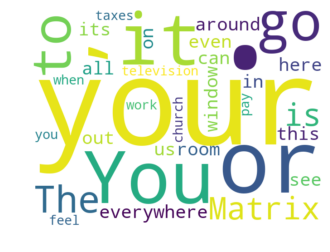

In [54]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 워드클라우드로 시각화

wcimg = WordCloud(#font_path=r'c:/Windows/Fonts/malgun.ttf', # colab에서 구동할 경우 경로 제외
    background_color='white', width=640, height=480).generate_from_frequencies(wc)

plt.imshow(wcimg, interpolation='bilinear')
plt.axis('off')
plt.show()

['privilege', 'chamber', 'behalf', 'time', 'country', 'ancient', 'warmth', 'welcome', 'night', 'hospitality', 'reception', 'cooperation', 'trade', 'relationship', 'principle', 'fairness', 'reciprocity', 'visit', 'pleasure', 'honor', 'friendship', 'alliance', 'crucible', 'war', 'history', 'spring', 'city', 'today', 'time', 'year', 'capital', 'bloody', 'way', 'line', 'today', 'line', 'time', 'armistice', 'price', 'country', 'freedom', 'brave', 'war', 'city', 'country', 'war', 'economy', 'nation', 'world', 'something', 'half', 'peninsula', 'family', 'city', 'city', 'country', 'today', 'world', 'lifetime', 'devastation', 'Today', 'economy', 'expectancy', 'today', 'election', 'year', 'today', 'something', 'miracle', 'stock', 'market', 'high', 'Unemployment', 'judiciary', 'justice', 'vicinity', 'peninsula', 'aircraft', 'world', 'maximum', 'fighter', 'addition', 'administration', 'equipment', 'world', 'peace', 'strength', 'country', 'end', 'anybody', 'nation', 'ally', 'future', 'inspiration',

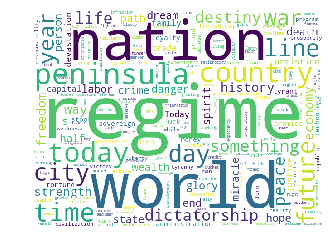

In [65]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 트럼프 연설문을 이용해서 wordcloud 시각화


from wordcloud import WordCloud
from nltk import FreqDist
import matplotlib.pyplot as plt

fd_words = FreqDist(nouns)
wc = dict(fd_words.most_common())

wcimg = WordCloud(background_color='white', width=640, height=480).generate_from_frequencies(wc)
wcimg.to_file('trump01.png') # 파일로 저장

print(nouns)

plt.imshow(wcimg)
plt.axis('off')
plt.show()

# 글자가 지저분해 보임. 따라서 아래와 같이 interpolation 지정

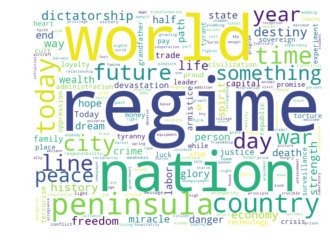

In [59]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
plt.imshow(wcimg, interpolation='bilinear')
plt.axis('off')
plt.show()

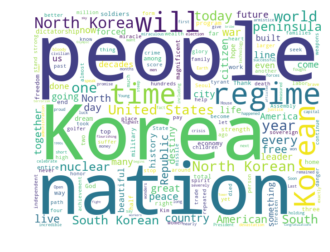

In [69]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####

f = open("thrump.txt", 'r', encoding='cp949')
doc = f.read()

#fd_words = FreqDist(nouns)
#wc = dict(fd_words.most_common())

wcimg = WordCloud(background_color='white', width=640, height=480).generate_from_text(doc) # 이건 알아서 단어 tokenize 및 워드클라우드 시각화
# 단, generate_from_text는 원소스 단어 단에서는 작동 안함?.. 
wcimg.to_file('trump02.png')

plt.imshow(wcimg, interpolation='bilinear')
plt.axis('off')
plt.show()

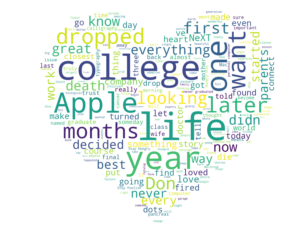

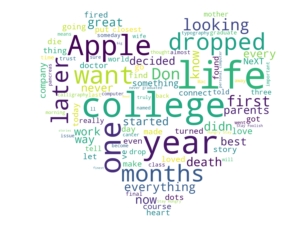

In [104]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####

import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

mask_path=r'h.jpg' # colab에 꼭 해당 이미지파일 먼저 업로드할 것

mask = np.array(Image.open(mask_path))
# 배경 이미지 파일을 numpy 배열로 변환

wcimg = WordCloud(background_color='white',
                 mask=mask, contour_color='firebrick' # 테두리 추가
                 ).generate_from_text(doc)

plt.imshow(wcimg, interpolation='bilinear')
plt.axis('off')
plt.show()




# -----------------------------------------------------------------------------
mask_path=r'h.jpg' # colab에 꼭 해당 이미지파일 먼저 업로드할 것

mask = np.array(Image.open(mask_path))
# 배경 이미지 파일을 numpy 배열로 변환

wcimg = WordCloud(background_color='white',
                 mask=mask, mode='RGBA',
                 contour_color='firebrick', # 테두리 추가
                 max_words=100, stopwords=STOPWORDS).generate_from_text(doc)

# 워드클라우드에 사용할 색상 설정하기
img_colors = ImageColorGenerator(mask)

plt.imshow(wcimg, interpolation='bilinear')
plt.axis('off')
plt.show()



In [83]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####

# 다양한 색상 팔레트를 이용한 워드클라우드
# jiffyclub.github.io/palettable

# 여러가지 배색들을 도와주는 패키지

!pip install palettable
!pip install colorbrewer

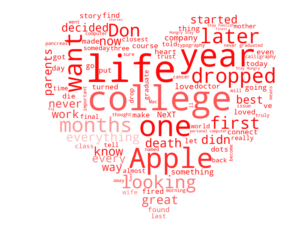

In [101]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####

# 워드클라우드 색상 지정
# 마스크에 적용하는 배경이미지 색상을 사용

from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

wcimg = WordCloud(background_color='white', 
                  mask=mask, # colab에 꼭 해당 이미지파일 먼저 업로드할 것
                  mode='RGBA', 
                  max_words=100, 
                  stopwords=STOPWORDS).generate_from_text(doc)

# 워드클라우드에 사용할 색상 설정하기
img_colors = ImageColorGenerator(mask)

plt.imshow(wcimg.recolor(color_func=img_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

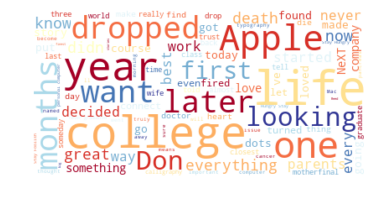

([165, 0, 38], [215, 48, 39], [244, 109, 67], [253, 174, 97], [254, 224, 144], [255, 255, 191], [224, 243, 248], [171, 217, 233], [116, 173, 209], [69, 117, 180], [49, 54, 149])
[[165, 0, 38], [215, 48, 39], [244, 109, 67], [253, 174, 97], [254, 224, 144], [255, 255, 191], [224, 243, 248], [171, 217, 233], [116, 173, 209], [69, 117, 180], [49, 54, 149]]


In [100]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####
# 다양한 색상 팔레트를 이용한 워드클라우드
# jiffyclub.github.io/palettable
# 여러가지 배색들을 도와주는 패키지

# pip install palettable
# pip install colorbrewer


# 색상팔레트 유형

# sequential : 수치데이터, 순서가 있는 데이터
# qualitative : 범주형 데이터 표기
# diverging : 수치 / 범주형 데이터 표기

import random
from palettable.colorbrewer.sequential import Reds_9
from palettable.colorbrewer.diverging import RdYlBu_11
from palettable.colorbrewer.qualitative import Pastel2_8


# 워드클라우드 문자출력에 사용할 색상팔레트를 함수로 정의

def color_func(word, font_size, position, 
               orientation, random_state=None, **kwargs):
#     return tuple(Reds_9.colors[random.randint(0, 8)])
     return tuple(RdYlBu_11.colors[random.randint(0, 10)]) # tuple화 시키지 않으면 하기 imshow() 시 에러남!
#     return tuple(Pastel2_8.colors[random.randint(0, 7)])

wcimg = WordCloud(background_color='white', 
                  max_words=100, 
                  stopwords=STOPWORDS).generate_from_text(doc)

plt.imshow(wcimg.recolor(color_func=color_func), # 주목할 점은, color_func함수에 들어갈 argument들을 
           # 시스템 내부적으로 알아서 insert해준다는 점. 다만, return값은 위에서 지정해준대로
           # 사용자 입장에서 지정할 것은 결국 return되는 색깔임 (그나마 그것도 index값은 randint로 지정/삽입함. 
           # 각 색깔모음 찍어보면 이유 알 수 있음)
           interpolation='bilinear')
plt.axis('off')
plt.show()

print(tuple(RdYlBu_11.colors))
print(RdYlBu_11.colors)

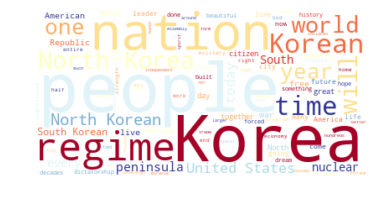

In [87]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####

wcimg = WordCloud(background_color='white', 
                  max_words=100, stopwords=STOPWORDS)\
.generate_from_text(doc).recolor(color_func=color_func)

plt.imshow(wcimg.recolor(color_func=color_func), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

[['I', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your', 'commencement', 'from', 'one', 'of', 'the', 'finest', 'universities', 'in', 'the', 'world', '.'], ['I', 'never', 'graduated', 'from', 'college', '.'], ['Truth', 'be', 'told', ',', 'this', 'is', 'the', 'closest', 'I', '’', 've', 'ever', 'gotten', 'to', 'a', 'college', 'graduation', '.'], ['Today', 'I', 'want', 'to', 'tell', 'you', 'three', 'stories', 'from', 'my', 'life', '.'], ['That', '’', 's', 'it', '.'], ['No', 'big', 'deal', '.'], ['Just', 'three', 'stories', '.'], ['The', 'first', 'story', 'is', 'about', 'connecting', 'the', 'dots', '.'], ['I', 'dropped', 'out', 'of', 'Reed', 'College', 'after', 'the', 'first', '6', 'months', ',', 'but', 'then', 'stayed', 'around', 'as', 'a', 'drop-in', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'I', 'really', 'quit', '.'], ['So', 'why', 'did', 'I', 'drop', 'out', '?'], ['It', 'started', 'before', 'I', 'was', 'born', '.'], ['My', 'biological', 'mother', 'was', '

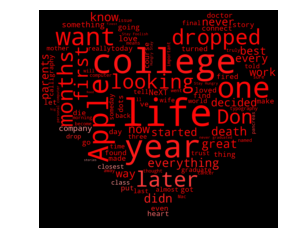

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [95]:
##### ------------------ 본 한글주석 by 유형균 (이메일 문의 : quantgeni@gmail.com) ------------------ #####

# 스티브 잡스의 스탠포드 대학 2005년 
# 졸업 축사에 대한 워드클라우드를 만들어 봄

#f = open("thrump.txt", 'r', encoding='cp949')
f = open('stevejobs2.txt', 'r')

doc = f.read()
doc


sentences = sent_tokenize(doc)
sentences

words = [word_tokenize(sent) for sent in sentences]
print(words)



# 불용어를 이용한 단어토큰화 실시

stopwords = nltk.corpus.stopwords.words('english')

all_tokens = []
for sent in words:   # 단어토큰화된 결과에서 한 문장을 읽어옴
    filter_words = []
    
    for word in sent:   # 문장에서 각 단어를 읽어옴
        word = word.lower()   # 소문자 변환
        
        if word not in stopwords:   # 불용어 목록에 단어 포함여부 확인
            filter_words.append(word)
    
    all_tokens.append(filter_words)

all_tokens


mask_path = r'h.jpg'   # 투명성 없는 파일 (colab temp에 업로드 해야함)

mask = np.array(Image.open(mask_path))
# 배경 이미지 파일을 numpy 배열로 변환

wcimg = WordCloud(background_color='black', 
                  mask=mask, 
                  mode='RGBA', 
                  max_words=100, 
                  stopwords=STOPWORDS).generate_from_text(doc)

# 워드클라우드에 사용할 색상 설정하기
img_colors = ImageColorGenerator(mask) # 원 이미지파일 > 넘파이배열변환 > 해당 넘파이배열로부터 이미지칼러제너레이트

plt.imshow(wcimg.recolor(color_func=img_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

print(mask)